In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_parquet("cmm_erdos_bootcamp_2020_timeseries.pq")

In [3]:
data.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


In [4]:
data.tail()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
1090,2019-12-27,2019,12,27,6,1,1,0,8362,3650,3661
1091,2019-12-28,2019,12,28,7,0,0,0,2906,1298,1232
1092,2019-12-29,2019,12,29,1,0,0,0,3024,1357,1349
1093,2019-12-30,2019,12,30,2,1,1,0,7444,3690,3690
1094,2019-12-31,2019,12,31,3,1,1,0,8324,3971,4062


In [5]:
data.describe()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
count,1095.00000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,2018.00000,6.526027,15.720548,3.994521,0.714155,0.693151,0.016438,6209.011872,3134.743379,2950.600913
std,0.81687,3.449427,8.800266,2.001363,0.452022,0.461397,0.127212,2546.338435,1232.288150,1157.136368
min,2017.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,974.000000,701.000000,574.000000
25%,2017.00000,4.000000,8.000000,2.000000,0.000000,0.000000,0.000000,3082.000000,1471.000000,1426.000000
50%,2018.00000,7.000000,16.000000,4.000000,1.000000,1.000000,0.000000,7000.000000,3646.000000,3408.000000
75%,2019.00000,10.000000,23.000000,6.000000,1.000000,1.000000,0.000000,8353.000000,4046.000000,3846.000000
max,2019.00000,12.000000,31.000000,7.000000,1.000000,1.000000,1.000000,10474.000000,5152.000000,4963.000000


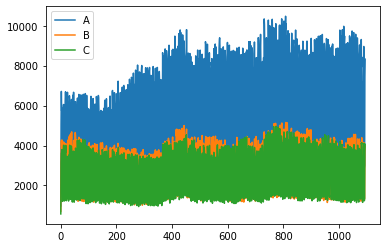

In [6]:
plt.plot(data['volume_A'],label="A")
plt.plot(data['volume_B'],label="B")
plt.plot(data['volume_C'],label="C")
plt.legend()

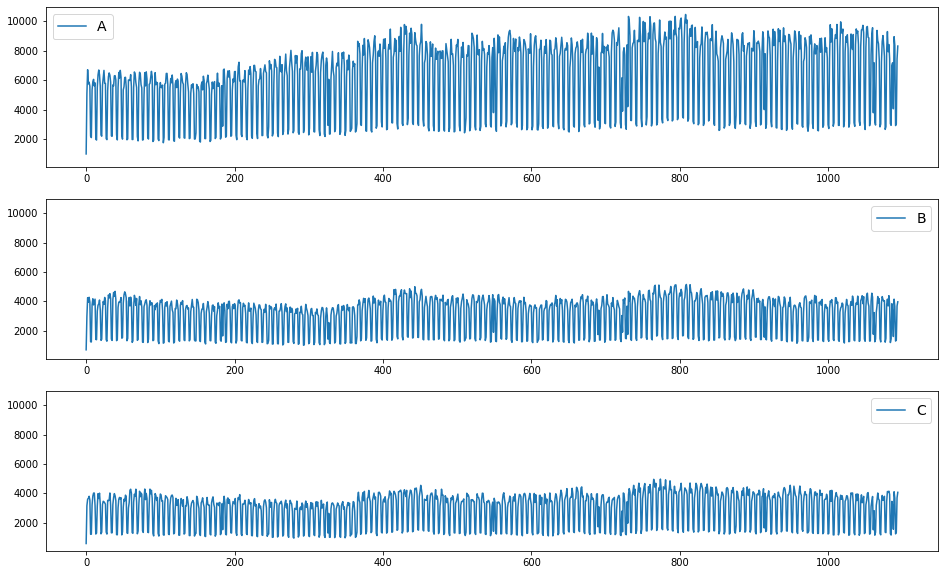

In [7]:
fig,ax = plt.subplots(3,1,figsize = (16,10),sharey=True)

ax[0].plot(data['volume_A'],label="A")
ax[1].plot(data['volume_B'],label="B")
ax[2].plot(data['volume_C'],label="C")

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

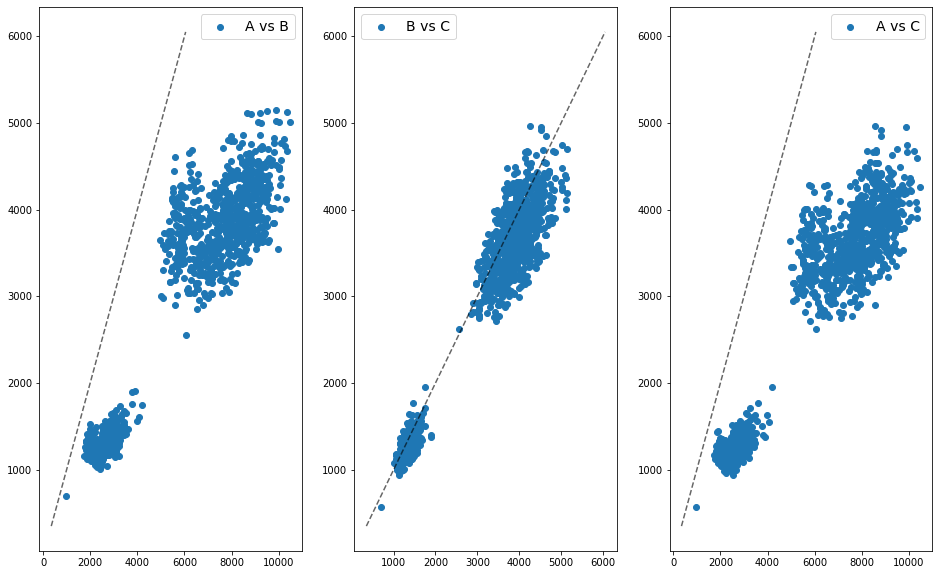

In [38]:
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=False)

ax[0].scatter(data['volume_A'],data['volume_B'],label="A vs B")
ax[1].scatter(data['volume_B'],data['volume_C'],label="B vs C")
ax[2].scatter(data['volume_A'],data['volume_C'],label="A vs C")

ax[0].plot(np.linspace(350,6050,10),
                np.linspace(350,6050,10),
               'k--', alpha = .6)
ax[1].plot(np.linspace(350,6050,10),
                np.linspace(350,6050,10),
               'k--', alpha = .6)
ax[2].plot(np.linspace(350,6050,10),
                np.linspace(350,6050,10),
               'k--', alpha = .6)

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [8]:
difference = data.diff(periods=1)

In [9]:
difference.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1 day, 0:00:00",0.0,0.0,1.0,1.0,1.0,0.0,-1.0,4099.0,2275.0,2575.0
2,"1 day, 0:00:00",0.0,0.0,1.0,1.0,0.0,1.0,0.0,1637.0,1273.0,446.0
3,"1 day, 0:00:00",0.0,0.0,1.0,1.0,0.0,0.0,0.0,-964.0,-307.0,56.0
4,"1 day, 0:00:00",0.0,0.0,1.0,1.0,0.0,0.0,0.0,117.0,337.0,141.0


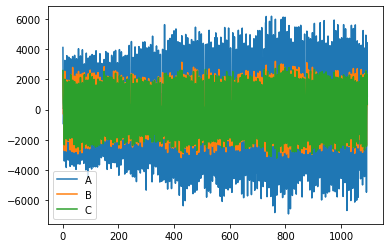

In [10]:
plt.plot(difference['volume_A'],label="A")
plt.plot(difference['volume_B'],label="B")
plt.plot(difference['volume_C'],label="C")
plt.legend()

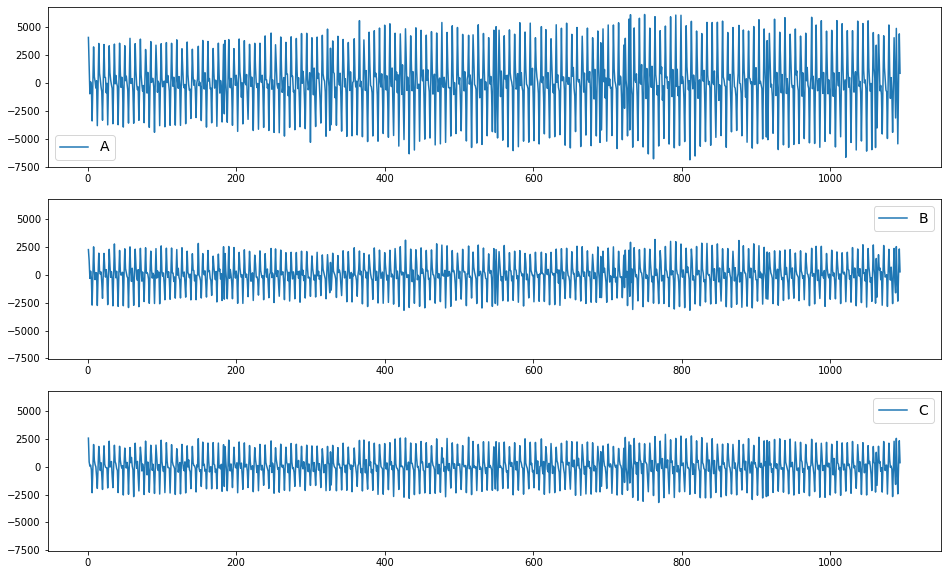

In [11]:
fig,ax = plt.subplots(3,1,figsize = (16,10),sharey=True)

ax[0].plot(difference['volume_A'],label="A")
ax[1].plot(difference['volume_B'],label="B")
ax[2].plot(difference['volume_C'],label="C")

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [12]:
# This function makes a lag_df 
# for easy plotting
def make_lag_df(df,feature,lag):
    lag_df = df.copy()
    lag_df[feature + '_lag'] = np.nan
    
    lag_df.loc[lag:,feature + '_lag'] = lag_df.loc[0:len(lag_df)-(lag+1),feature].values
    return lag_df

In [13]:
# A function to make our plotting easier
def plot_lag(df,feature,lag,ax=None):
    df = make_lag_df(df,feature,lag).dropna()
    if ax:
        ax.scatter(df[feature+'_lag'],df[feature])

        ax.plot(np.linspace(350,10050,10),
                np.linspace(350,10050,10),
               'k--', alpha = .6)

        ax.set_title("lag = " + str(lag),fontsize=12)
    else:
        plt.scatter(df[feature+'_lag'],df[feature])

        plt.plot(np.linspace(350,10000,10000),
                np.linspace(350,10000,10000),
               'k--', alpha = .6)

        plt.show()

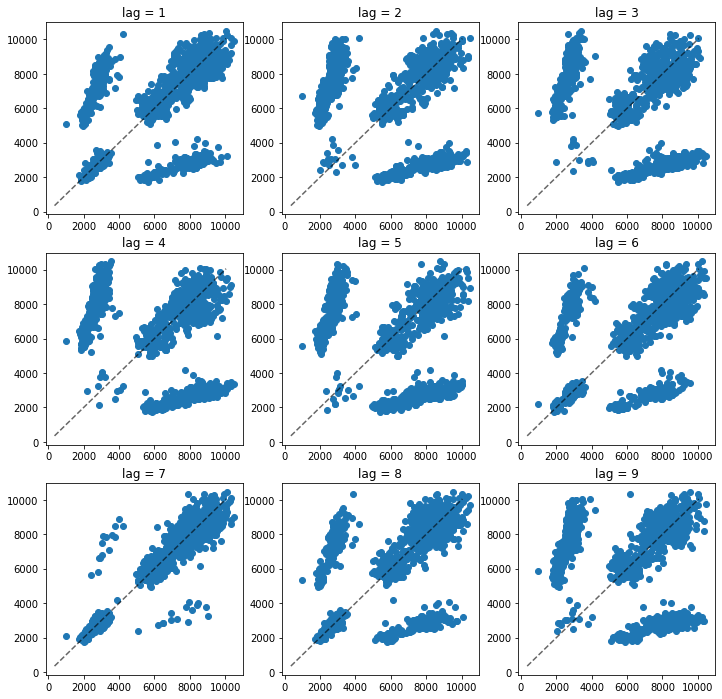

In [14]:
# we'll make lag plot for lag = 1 to 9

fig,ax = plt.subplots(3,3,
                      figsize = (12,12))

for i in range(1,10):
    plot_lag(data,'volume_A',i,ax[(i-1)//3, (i-1)%3])

plt.show()

In [15]:
data.to_csv('data.csv')

In [16]:
data_month = data.head(30)

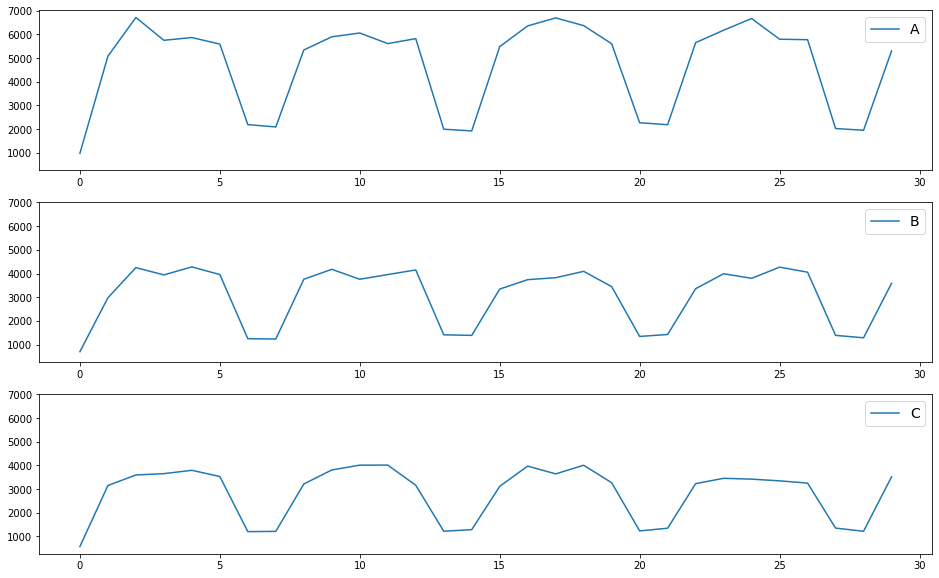

In [17]:
fig,ax = plt.subplots(3,1,figsize = (16,10),sharey=True)

ax[0].plot(data_month['volume_A'],label="A")
ax[1].plot(data_month['volume_B'],label="B")
ax[2].plot(data_month['volume_C'],label="C")

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

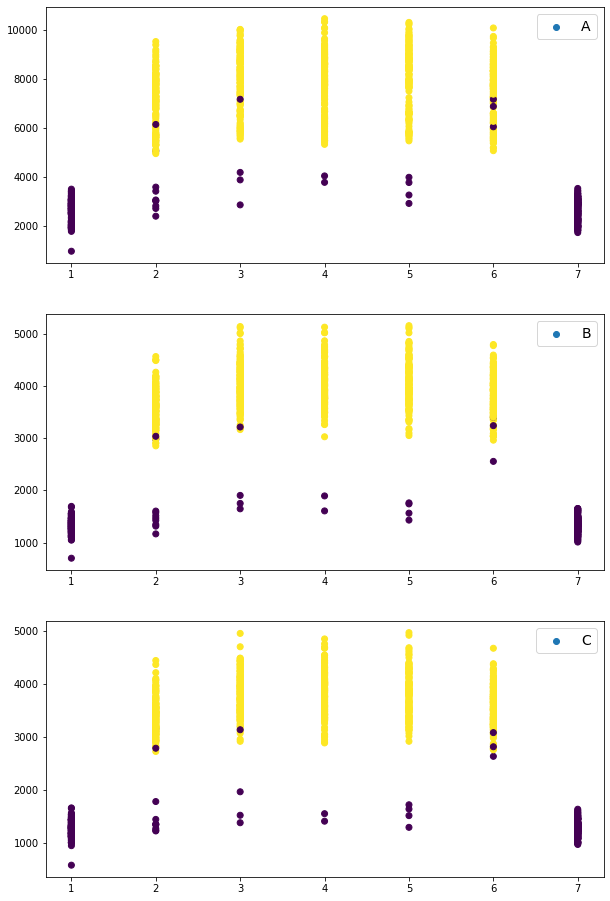

In [18]:
fig,ax = plt.subplots(3,1,figsize = (10,16))

ax[0].scatter(data['day_of_week'] ,data['volume_A'],label="A",c=data['is_workday'])
ax[1].scatter(data['day_of_week'] ,data['volume_B'],label="B",c=data['is_workday'])
ax[2].scatter(data['day_of_week'] ,data['volume_C'],label="C",c=data['is_workday'])

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [19]:
data.corr()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
calendar_year,1.000000e+00,-2.016885e-17,4.517460e-19,0.001118,0.002476,1.615536e-17,-2.624582e-18,0.305712,0.128411,0.162898
calendar_month,-2.016885e-17,1.000000e+00,1.189318e-02,0.001477,-0.009001,-3.288310e-02,3.651965e-02,0.008256,-0.139366,-0.127855
calendar_day,4.517460e-19,1.189318e-02,1.000000e+00,0.001626,0.005867,1.374151e-03,-2.202101e-02,0.006083,0.000386,0.010590
day_of_week,1.118237e-03,1.477151e-03,1.625655e-03,1.000000,0.001298,1.500548e-02,-6.427094e-02,0.034117,0.037445,0.035121
is_weekday,2.475541e-03,-9.000802e-03,5.866830e-03,0.001298,1.000000,9.508676e-01,6.589319e-02,0.884200,0.924218,0.921236
is_workday,1.615536e-17,-3.288310e-02,1.374151e-03,0.015005,0.950868,1.000000e+00,-1.943031e-01,0.903119,0.948818,0.945981
is_holiday,-2.624582e-18,3.651965e-02,-2.202101e-02,-0.064271,0.065893,-1.943031e-01,1.000000e+00,-0.152173,-0.169217,-0.171585
volume_A,3.057121e-01,8.255569e-03,6.082706e-03,0.034117,0.884200,9.031191e-01,-1.521732e-01,1.000000,0.928147,0.933327
volume_B,1.284115e-01,-1.393662e-01,3.858340e-04,0.037445,0.924218,9.488179e-01,-1.692174e-01,0.928147,1.000000,0.965785
volume_C,1.628982e-01,-1.278551e-01,1.058999e-02,0.035121,0.921236,9.459807e-01,-1.715849e-01,0.933327,0.965785,1.000000


In [20]:
filter_data = data.drop(data[data['is_workday'] == 0 ].index)

In [21]:
filter_data.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792
5,2017-01-06,2017,1,6,6,1,1,0,5586,3956,3530
8,2017-01-09,2017,1,9,2,1,1,0,5337,3757,3214


In [22]:
filter_data.corr()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
calendar_year,1.000000,-0.001885,-0.006114,-0.005730,NaN,NaN,NaN,0.785429,0.454435,0.567236
calendar_month,-0.001885,1.000000,-0.008580,-0.005181,NaN,NaN,NaN,0.073568,-0.427676,-0.359545
calendar_day,-0.006114,-0.008580,1.000000,-0.011389,NaN,NaN,NaN,-0.009995,-0.018724,0.020532
day_of_week,-0.005730,-0.005181,-0.011389,1.000000,NaN,NaN,NaN,0.073034,0.118374,0.117069
is_weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_workday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume_A,0.785429,0.073568,-0.009995,0.073034,NaN,NaN,NaN,1.000000,0.479409,0.531147
volume_B,0.454435,-0.427676,-0.018724,0.118374,NaN,NaN,NaN,0.479409,1.000000,0.626450
volume_C,0.567236,-0.359545,0.020532,0.117069,NaN,NaN,NaN,0.531147,0.626450,1.000000


In [23]:
difference.corr()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
calendar_year,1.000000,-0.939989,-0.240105,0.017453,0.039932,-0.039453,0.239486,-0.030042,-0.023187,-0.020387
calendar_month,-0.939989,1.000000,-0.105384,-0.017895,-0.040944,0.033526,-0.224190,0.026561,0.014960,0.012310
calendar_day,-0.240105,-0.105384,1.000000,0.000136,0.000630,0.020108,-0.060130,0.012625,0.025348,0.025505
day_of_week,0.017453,-0.017895,0.000136,1.000000,0.000697,0.000686,-0.002084,0.004005,0.004388,0.000581
is_weekday,0.039932,-0.040944,0.000630,0.000697,1.000000,0.943513,0.066889,0.915639,0.920712,0.917910
is_workday,-0.039453,0.033526,0.020108,0.000686,0.943513,1.000000,-0.197502,0.948529,0.956593,0.953317
is_holiday,0.239486,-0.224190,-0.060130,-0.002084,0.066889,-0.197502,1.000000,-0.215419,-0.216610,-0.224610
volume_A,-0.030042,0.026561,0.012625,0.004005,0.915639,0.948529,-0.215419,1.000000,0.952288,0.950652
volume_B,-0.023187,0.014960,0.025348,0.004388,0.920712,0.956593,-0.216610,0.952288,1.000000,0.954685
volume_C,-0.020387,0.012310,0.025505,0.000581,0.917910,0.953317,-0.224610,0.950652,0.954685,1.000000


In [24]:
diff2 = data.diff(periods=2)
diff2.corr()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
calendar_year,1.000000,-0.941903,-0.236471,0.004758,0.060037,0.019811,0.169653,0.039110,0.033862,0.035006
calendar_month,-0.941903,1.000000,-0.103478,-0.004914,-0.064874,-0.027261,-0.151275,-0.046665,-0.043579,-0.045568
calendar_day,-0.236471,-0.103478,1.000000,0.000423,0.010391,0.020860,-0.065195,0.019861,0.026332,0.029192
day_of_week,0.004758,-0.004914,0.000423,1.000000,0.000765,0.017533,-0.093798,0.045328,0.049615,0.047899
is_weekday,0.060037,-0.064874,0.010391,0.000765,1.000000,0.964152,0.094665,0.953593,0.956754,0.955550
is_workday,0.019811,-0.027261,0.020860,0.017533,0.964152,1.000000,-0.134677,0.970278,0.975030,0.974979
is_holiday,0.169653,-0.151275,-0.065195,-0.093798,0.094665,-0.134677,1.000000,-0.107136,-0.112571,-0.115625
volume_A,0.039110,-0.046665,0.019861,0.045328,0.953593,0.970278,-0.107136,1.000000,0.973373,0.974080
volume_B,0.033862,-0.043579,0.026332,0.049615,0.956754,0.975030,-0.112571,0.973373,1.000000,0.976805
volume_C,0.035006,-0.045568,0.029192,0.047899,0.955550,0.974979,-0.115625,0.974080,0.976805,1.000000


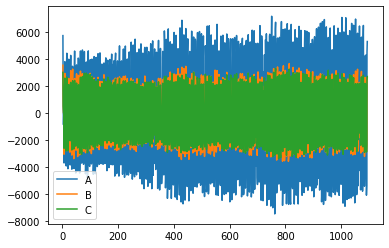

In [25]:
plt.plot(diff2['volume_A'],label="A")
plt.plot(diff2['volume_B'],label="B")
plt.plot(diff2['volume_C'],label="C")
plt.legend()

In [26]:
diff3 = data.diff(periods=3)
diff3.corr()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
calendar_year,1.000000,-0.943826,-0.232761,-0.010729,0.065552,0.032150,0.138776,0.055197,0.045367,0.054728
calendar_month,-0.943826,1.000000,-0.101533,0.010956,-0.072518,-0.039820,-0.129370,-0.064505,-0.054809,-0.064765
calendar_day,-0.232761,-0.101533,1.000000,0.000413,0.016619,0.021120,-0.037610,0.024430,0.025299,0.026845
day_of_week,-0.010729,0.010956,0.000413,1.000000,0.000000,0.015479,-0.076784,0.039238,0.041009,0.039313
is_weekday,0.065552,-0.072518,0.016619,0.000000,1.000000,0.964672,0.067667,0.958756,0.962951,0.963502
is_workday,0.032150,-0.039820,0.021120,0.015479,0.964672,1.000000,-0.159730,0.971306,0.977513,0.976483
is_holiday,0.138776,-0.129370,-0.037610,-0.076784,0.067667,-0.159730,1.000000,-0.116879,-0.126575,-0.120658
volume_A,0.055197,-0.064505,0.024430,0.039238,0.958756,0.971306,-0.116879,1.000000,0.976030,0.975649
volume_B,0.045367,-0.054809,0.025299,0.041009,0.962951,0.977513,-0.126575,0.976030,1.000000,0.979677
volume_C,0.054728,-0.064765,0.026845,0.039313,0.963502,0.976483,-0.120658,0.975649,0.979677,1.000000


In [27]:
diff4 = data.diff(periods=4)
diff4.corr()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
calendar_year,1.000000,-0.945757,-0.228969,-0.009371,0.056972,0.027967,0.120405,0.055292,0.044003,0.052462
calendar_month,-0.945757,1.000000,-0.099544,0.009461,-0.062817,-0.038051,-0.096707,-0.065314,-0.054673,-0.064778
calendar_day,-0.228969,-0.099544,1.000000,0.000669,0.014202,0.028852,-0.078937,0.026948,0.029476,0.034160
day_of_week,-0.009371,0.009461,0.000669,1.000000,0.001051,0.016873,-0.078284,0.040203,0.042237,0.040573
is_weekday,0.056972,-0.062817,0.014202,0.001051,1.000000,0.964616,0.067716,0.958710,0.963950,0.963100
is_workday,0.027967,-0.038051,0.028852,0.016873,0.964616,1.000000,-0.159860,0.970632,0.977333,0.975752
is_holiday,0.120405,-0.096707,-0.078937,-0.078284,0.067716,-0.159860,1.000000,-0.114997,-0.122623,-0.121463
volume_A,0.055292,-0.065314,0.026948,0.040203,0.958710,0.970632,-0.114997,1.000000,0.975590,0.974862
volume_B,0.044003,-0.054673,0.029476,0.042237,0.963950,0.977333,-0.122623,0.975590,1.000000,0.978838
volume_C,0.052462,-0.064778,0.034160,0.040573,0.963100,0.975752,-0.121463,0.974862,0.978838,1.000000


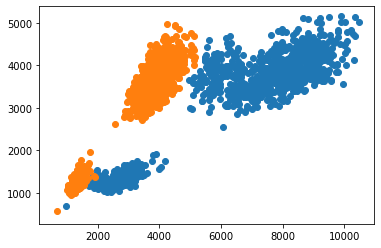

In [31]:
plt.scatter(data['volume_A'],data['volume_B'])
plt.scatter(data['volume_B'],data['volume_C'])